In [1]:
from fastai.vision import *
from fastai.vision.data import *
import numpy as np 
import pandas as pd
import tensorflow as tf 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

In [2]:
labels = ['0','1','2','3','4','5']
classes = labels

In [3]:
path = "train_data"
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0.5)
data = (ImageList.from_csv(path, csv_name = 'train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = 'data_test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

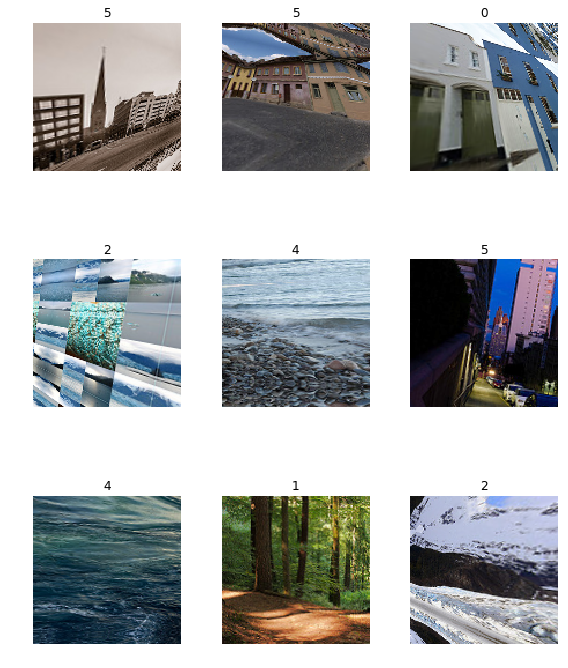

In [4]:
data.show_batch(rows=3, figsize=(8,10))

In [5]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [6]:
learn = create_cnn(data,models.resnet50,metrics=[error_rate, accuracy])

c:\users\rohit\virtualenv\lib\site-packages\fastai\vision\learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [7]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.528301,0.301172,0.112742,0.887258,01:32
1,0.370901,0.238243,0.087493,0.912507,01:28
2,0.329058,0.217058,0.083089,0.916911,01:28
3,0.292195,0.199211,0.073987,0.926013,01:28
4,0.264036,0.195637,0.071345,0.928655,01:28


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

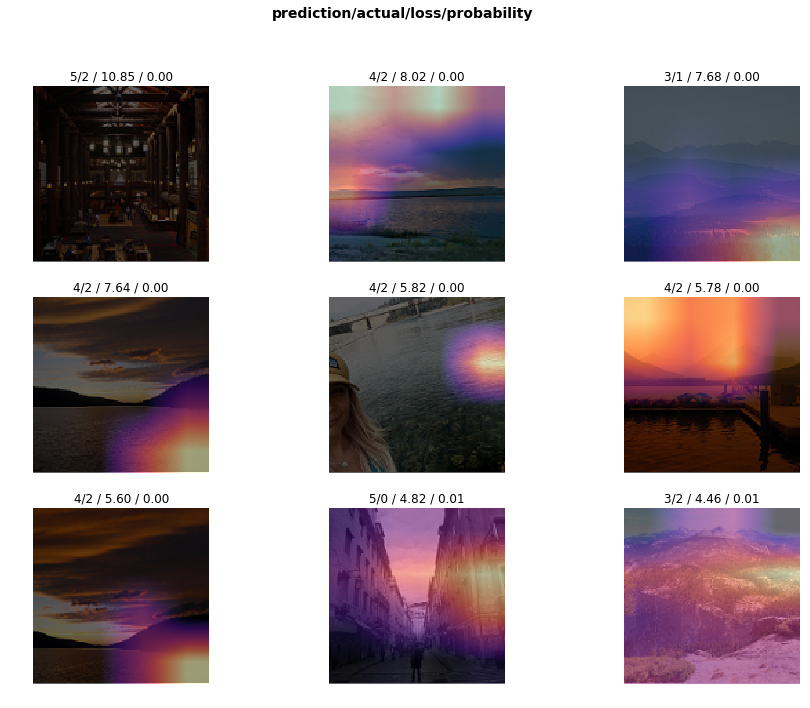

In [9]:
interp.plot_top_losses(9, figsize=(15,11))

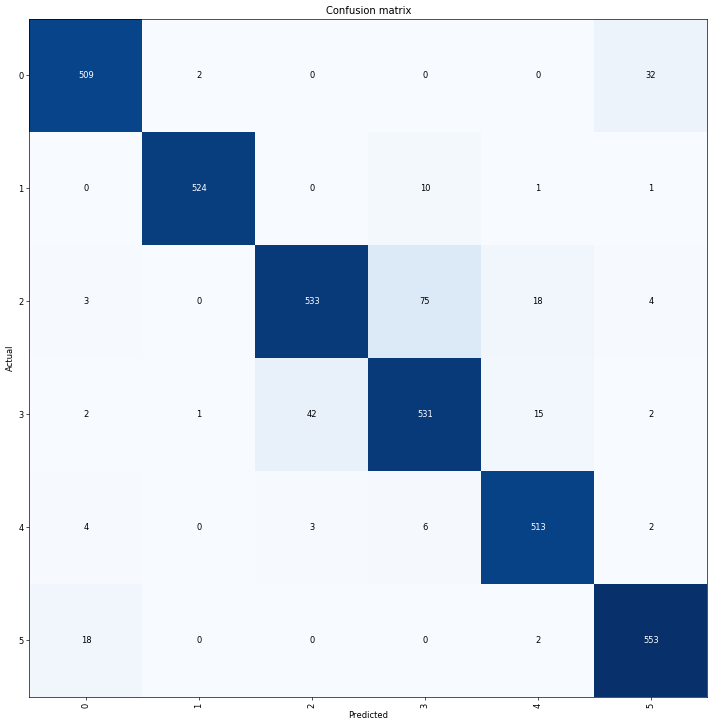

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [11]:
interp.most_confused(min_val=5)

[(2, 3, 75),
 (3, 2, 42),
 (0, 5, 32),
 (2, 4, 18),
 (5, 0, 18),
 (3, 4, 15),
 (1, 3, 10),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


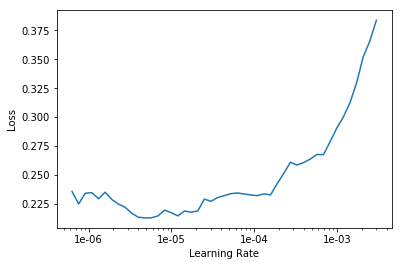

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.save('stage1')

# Stage 2

In [14]:
learn.fit_one_cycle(5, max_lr=slice(8e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.254325,0.190336,0.067821,0.932178,01:39
1,0.237460,0.176651,0.065473,0.934527,01:41
2,0.214912,0.169757,0.060775,0.939225,01:41
3,0.184924,0.169080,0.064005,0.935995,01:40
4,0.183256,0.165901,0.059014,0.940987,01:40


In [15]:
learn.save('stage2')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

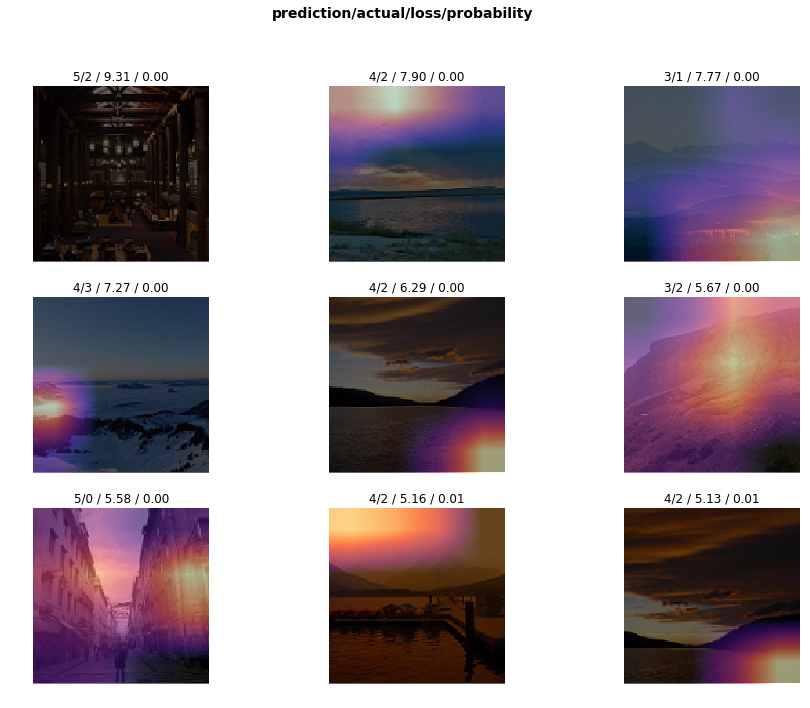

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

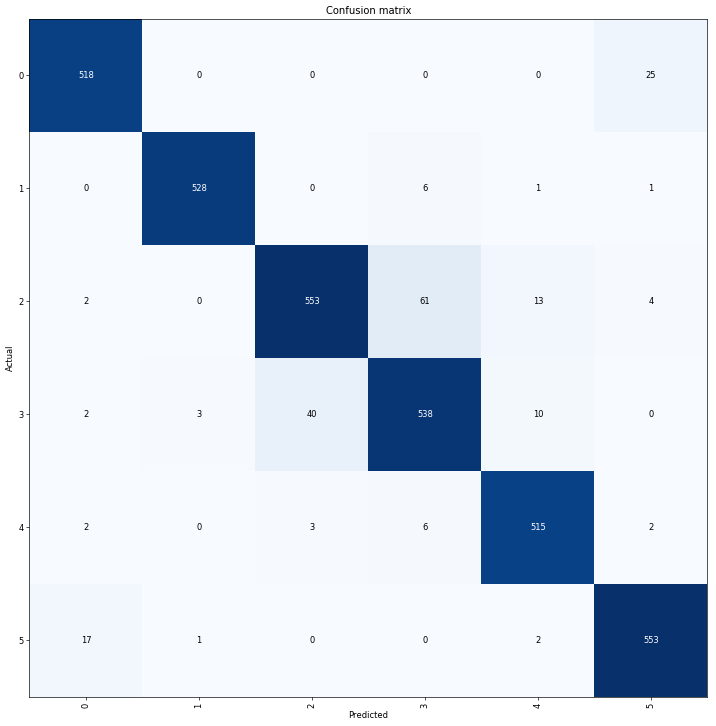

In [18]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=5)

[(2, 3, 61),
 (3, 2, 40),
 (0, 5, 25),
 (5, 0, 17),
 (2, 4, 13),
 (3, 4, 10),
 (1, 3, 6),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


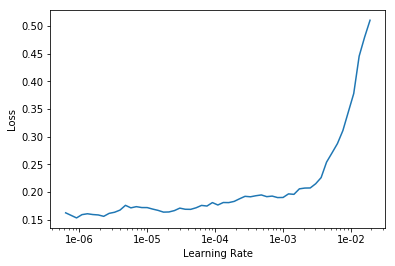

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

# Stage 3

In [21]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,4e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.187798,0.169469,0.060188,0.939812,01:39
1,0.194693,0.165241,0.057839,0.942161,01:40
2,0.187964,0.165362,0.059307,0.940693,01:40
3,0.167545,0.169129,0.059601,0.940399,01:40
4,0.171460,0.168549,0.061362,0.938638,01:41


In [22]:
learn.save('stage3')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

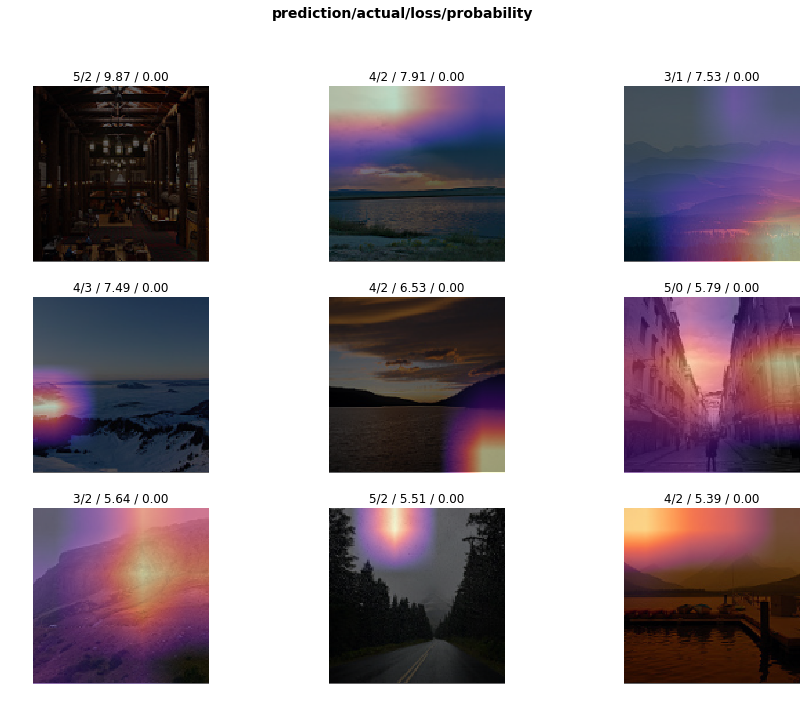

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

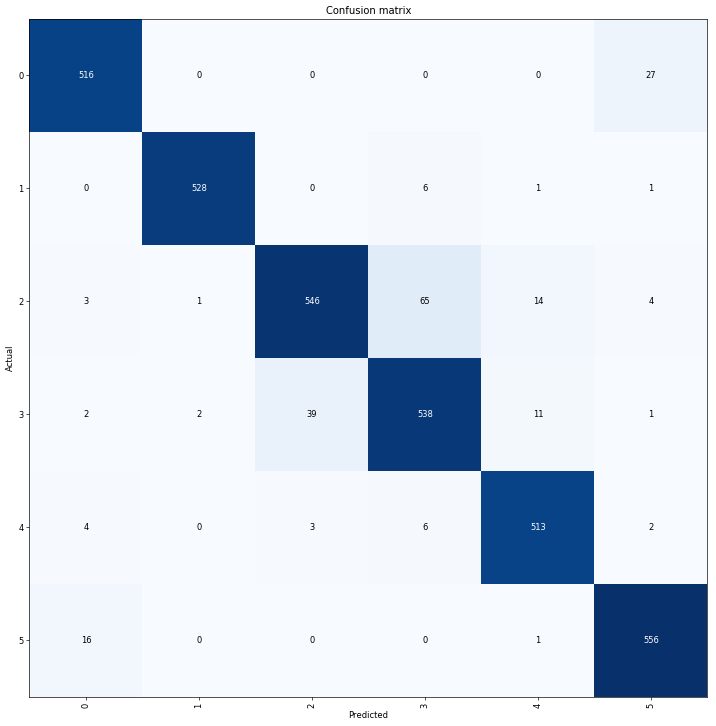

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
interp.most_confused(min_val=5)

[(2, 3, 65),
 (3, 2, 39),
 (0, 5, 27),
 (5, 0, 16),
 (2, 4, 14),
 (3, 4, 11),
 (1, 3, 6),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


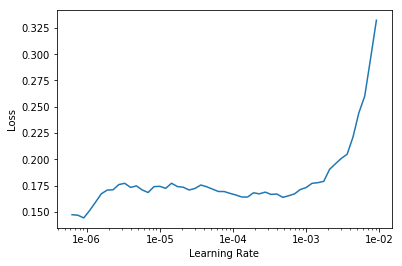

In [27]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [31]:
path = 'train-scene/train'
print(path)

train-scene/train


In [32]:
test = pd.read_csv('test.csv')

In [33]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = str(path)+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
answer.to_csv('submission.csv')

In [47]:
import gc
gc.collect()

53

In [38]:
answer.head()

,image_name,label,probability
0,3.jpg,5,0.999969
1,5.jpg,0,0.999574
2,6.jpg,4,0.999817
3,11.jpg,2,0.768577
4,14.jpg,5,0.996929


In [42]:
answer.probability.sum() / answer.probability.count()

0.9439652785913958

In [52]:
uncertain = answer.loc[answer['probability']<0.5]

# Stage 4

In [54]:
learn.fit_one_cycle(5, max_lr=slice(1e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.177996,0.164874,0.060775,0.939225,01:48
1,0.182809,0.166922,0.059014,0.940987,01:42
2,0.179246,0.167208,0.059307,0.940693,01:43
3,0.174500,0.166920,0.058720,0.941280,01:43
4,0.166213,0.166436,0.061069,0.938931,01:43


In [55]:
learn.save('stage4')

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

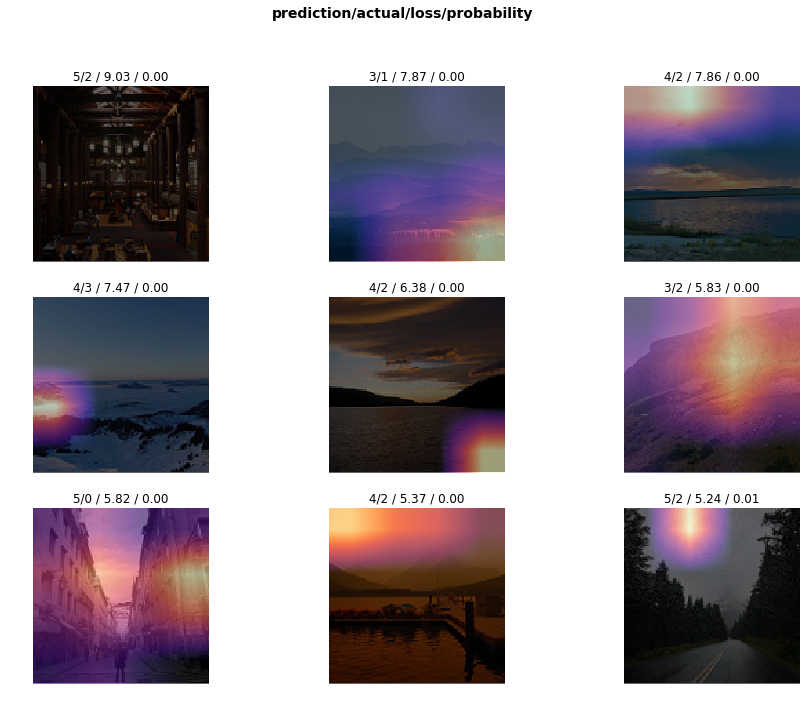

In [58]:
interp.plot_top_losses(9, figsize=(15,11))

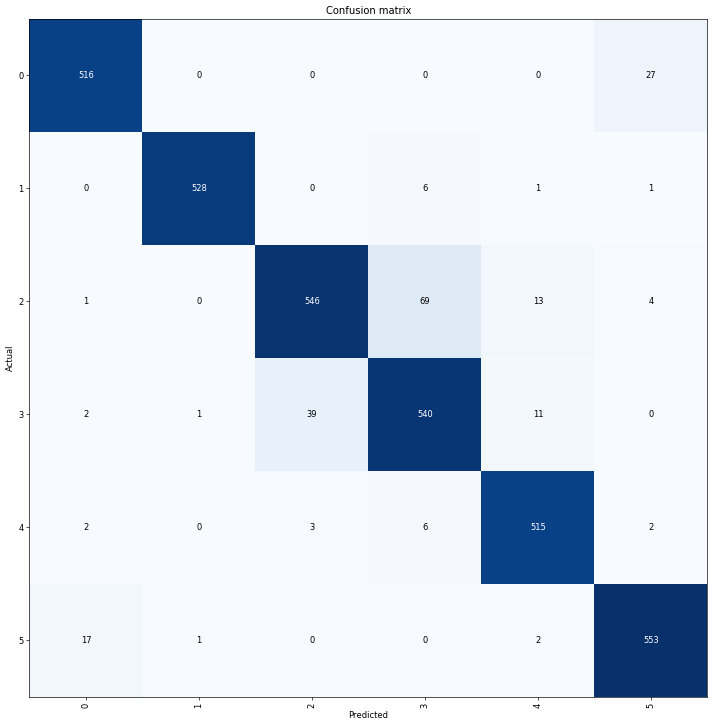

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=5)

[(2, 3, 69),
 (3, 2, 39),
 (0, 5, 27),
 (5, 0, 17),
 (2, 4, 13),
 (3, 4, 11),
 (1, 3, 6),
 (4, 3, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


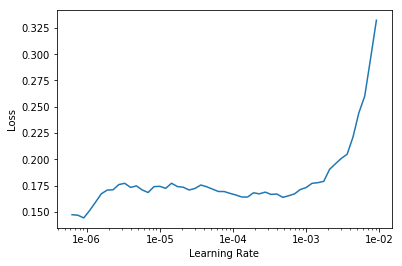

In [27]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [61]:
path = 'train-scene/train'
print(path)

train-scene/train


In [62]:
test = pd.read_csv('test.csv')

In [63]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = str(path)+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
answer.to_csv('submission.csv')

In [64]:
import gc
gc.collect()

18295

# Densenet

In [1]:
from fastai.vision import *

In [2]:
path = "train_data"
tfms = get_transforms(flip_vert=False,max_zoom=1.1,max_warp=0.5,max_lighting=0.3,p_lighting = 0.5 )
data = (ImageList.from_csv(path, csv_name = 'train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = 'data_test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

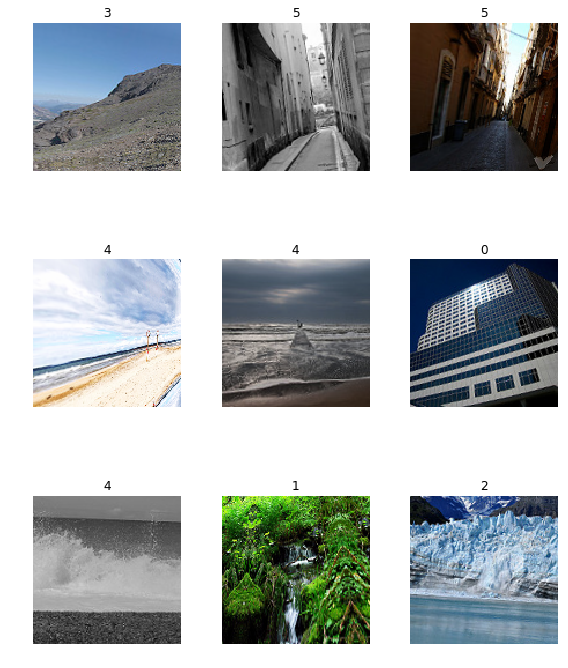

In [3]:
data.show_batch(rows=3, figsize=(8,10))

In [4]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [5]:
learn = cnn_learner(data,models.densenet121,metrics=[error_rate, accuracy])

c:\users\rohit\virtualenv\lib\site-packages\torchvision\models\densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [73]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.444784,0.289783,0.106577,0.893423,01:51
1,0.368033,0.240774,0.087493,0.912507,01:46
2,0.298481,0.206695,0.076629,0.923371,01:47
3,0.262897,0.193968,0.069877,0.930123,01:49
4,0.242960,0.189306,0.070757,0.929242,01:47


In [74]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

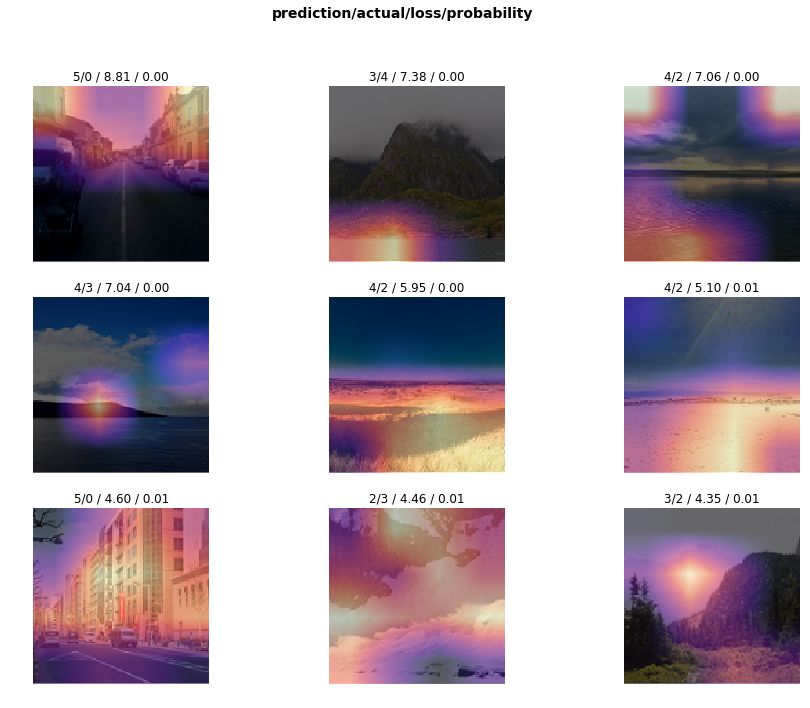

In [75]:
interp.plot_top_losses(9, figsize=(15,11))

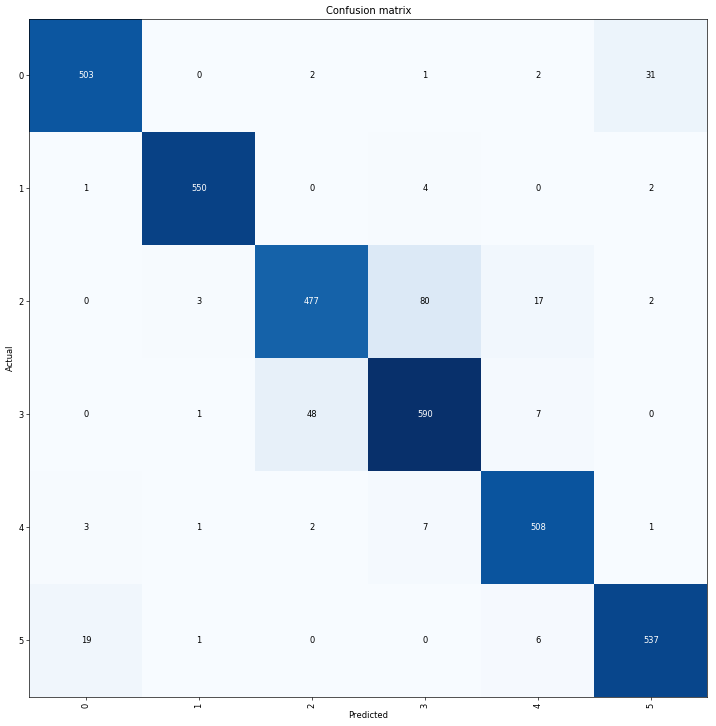

In [76]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [77]:
interp.most_confused(min_val=5)

[(2, 3, 80),
 (3, 2, 48),
 (0, 5, 31),
 (5, 0, 19),
 (2, 4, 17),
 (3, 4, 7),
 (4, 3, 7),
 (5, 4, 6)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


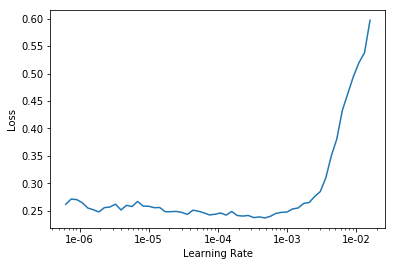

In [78]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [79]:
learn.save('stage1')

In [80]:
import gc 
gc.collect()

6565

# Stage 2

In [6]:
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (13628 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
0,4,5,0,4
Path: train_data;

Valid: LabelList (3406 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,5,2,5,2
Path: train_data;

Test: LabelList (0 items)
x: ImageList

y: EmptyLabelList

Path: train_data, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

In [7]:
learn.fit_one_cycle(5,max_lr = slice(5e-5,9e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.243700,0.147333,0.055490,0.944510,01:50
1,0.230505,0.164442,0.063418,0.936583,01:45
2,0.232710,0.152175,0.058426,0.941574,01:51
3,0.221018,0.147312,0.056371,0.943629,01:46
4,0.208255,0.146576,0.057839,0.942161,01:45


In [8]:
learn.save('stage-2-densenet')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

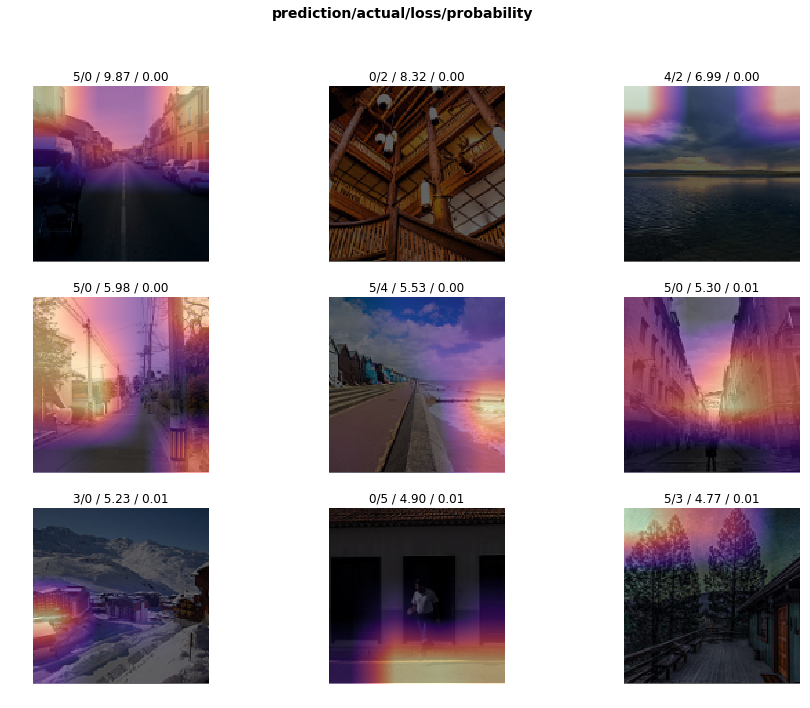

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

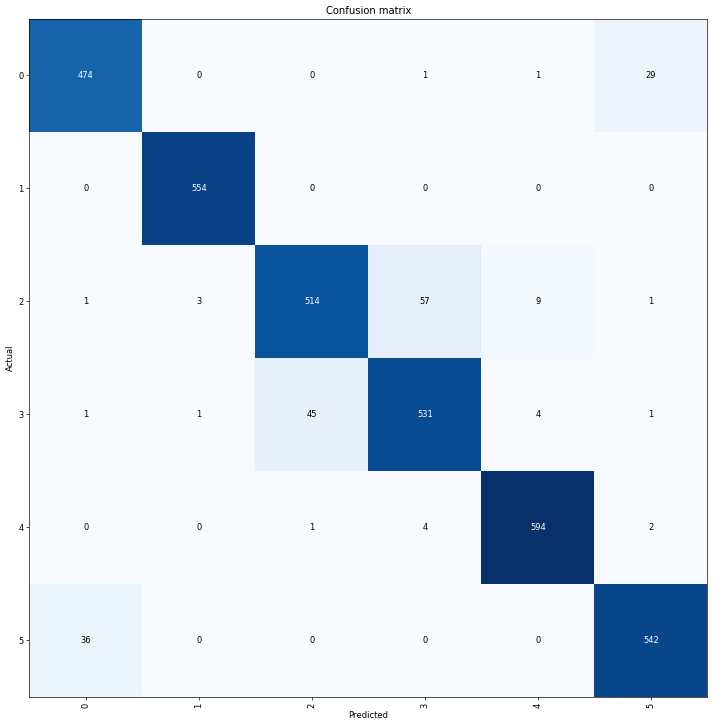

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=5)

[(2, 3, 57), (3, 2, 45), (5, 0, 36), (0, 5, 29), (2, 4, 9)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


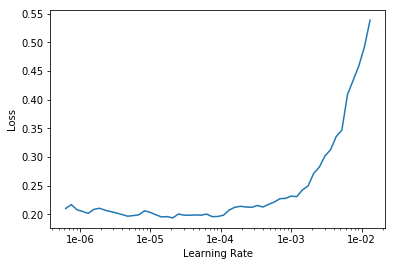

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [16]:
test = pd.read_csv('test.csv')

In [14]:
import gc 
gc.collect()

6580

In [17]:
path='train-scene/train'

In [18]:
images = []
prediction = []
probability = []
for i in test['image_name']:
  images.append(i)
  link = str(path)+'/'+i
  img = open_image(link)
  pred_class,pred_idx,outputs = learn.predict(img)
  prediction.append(pred_class.obj)
  probability.append(outputs.abs().max().item())
answer = pd.DataFrame({'image_name':images,'label':prediction,'probability':probability})
answer.head()
#answer.to_csv('submission.csv')

,image_name,label,probability
0,3.jpg,5,0.999823
1,5.jpg,0,0.999121
2,6.jpg,4,0.999885
3,11.jpg,4,0.407502
4,14.jpg,5,0.999210


In [19]:
uncertain = answer.loc[answer['probability']<0.5].count()
print(uncertain)

image_name     43
label          43
probability    43
dtype: int64


In [20]:
answer.to_csv('submission.csv')